# Digit Recognition Using CNN

In [1]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [3]:
# Loading our data to training and test set

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

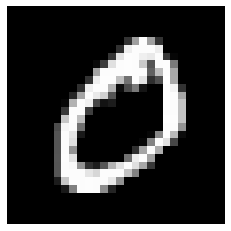

In [8]:
# Visualizing data for better understanding

plt.imshow(X_train[1], cmap = 'gray')
plt.axis('off')
plt.show()

In [9]:
y_train[1]

0

In [10]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
# Normalizing our data in range [0, 1] 

X_train = X_train / 255
X_test = X_test / 255

In [12]:
# Reshaping our data

X_train = X_train.reshape(-1, 28, 28,1)
X_test = X_test.reshape(-1, 28, 28,1)

In [13]:
# Defining our Sequential model

model = keras.Sequential([
                          keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (28, 28, 1), activation = 'relu'),
                          keras.layers.MaxPooling2D((2, 2)),

                          keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
                          keras.layers.MaxPooling2D((2, 2)),

                          keras.layers.Flatten(),
                          keras.layers.Dense(100, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid')
])

In [14]:
# Compiling our model

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
# Training our Model

model.fit(X_train, y_train,
          epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.3028 - accuracy: 0.9081
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0458 - accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0195 - accuracy: 0.9937
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0149 - accuracy: 0.9955
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0079 - accuracy: 0.9971
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.005

In [16]:
# Calculating loss and accuracy on our test data

loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0401 - accuracy: 0.9895


In [17]:
print("Accuracy: ", accuracy)

Accuracy:  0.9894999861717224


In [18]:
print("Loss: ", loss)

Loss:  0.040095455944538116


In [19]:
# Making Prediction on test data

y_pred = model.predict(X_test)
y_pred[0]

array([3.4402063e-04, 2.0497260e-03, 6.3057453e-03, 5.0151831e-01,
       5.2114516e-01, 3.7848626e-05, 1.8129029e-10, 9.9999988e-01,
       3.5509333e-02, 7.8710996e-02], dtype=float32)

Our y_pred is in categorical format, so we changed it

In [20]:
pred_labels = [np.argmax(i) for i in y_pred]

In [21]:
print(pred_labels[: 10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [22]:
print(y_test[: 10])

[7 2 1 0 4 1 4 9 5 9]


In [23]:
# Calculating Confusion Matrix

cm = tf.math.confusion_matrix(y_test, pred_labels)

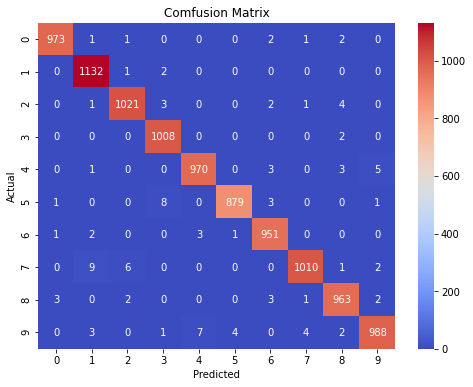

In [24]:
# Visualizing Confusion Matrix

plt.figure(figsize = (8, 6))
sns.heatmap(cm, cmap = 'coolwarm', annot = True, fmt = 'd')
plt.title("Comfusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
from keras.preprocessing import image

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


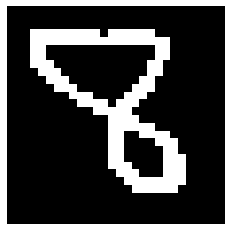

In [28]:
from keras.preprocessing import image
img = image.load_img('img08.png', grayscale = True, target_size = (28, 28,1))
plt.imshow(img, cmap = 'gray')
plt.axis('off')
img = image.img_to_array(img)
img = img / 255.0
img = img.reshape((1, 28, 28, 1))
img_class = model.predict(img)
img_class = np.argmax(img_class)
prediction = img_class

In [29]:
print("Our Predicted value \n", prediction)

Our Predicted value 
 8
